In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot8Dims_T256_H05_tl_110data_StbleTgt_FULLDATA_NORMALNOISE import get_config

In [2]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 10240
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [3]:
import pandas as pd
def get_drift_files_nonfull(config, root_dir ):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/8DDimsNormalNoise/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "bwidx" in file:
                mses_full = pd.read_parquet(root_nadaraya_dir+file)
                print(mses_full)
                mses.append(mses_full)
    mses = pd.concat(mses).sort_values("bw", axis=0)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

          bw          mse
18  0.041919  1640.335812
             bw      mse
56  2511.886432  5.54155
           bw       mse
43  25.118864  5.534273
         bw       mse
37  6.16595  5.411375
          bw         mse
23  0.168214  308.995825
          bw          mse
16  0.024046  2100.726964
         bw          mse
5  0.001131  2636.786591
            bw       mse
51  251.188643  5.541477
           bw       mse
45  39.810717  5.538663
           bw       mse
47  63.095734  5.540402
          bw          mse
12  0.007912  2546.845214
          bw       mse
38  7.852356  5.463333
         bw          mse
0  0.000282  2639.571984
          bw          mse
10  0.004538  2605.253304
             bw       mse
57  3981.071706  5.541549
         bw          mse
1  0.000372  2639.585105
        bw       mse
54  1000.0  5.541545
            bw       mse
50  158.489319  5.541368
           bw       mse
42  19.952623  5.529976
           bw       mse
40  12.589254  5.512069
          bw      

Text(0.5, 1.0, 'Minimum MSE is (4.226884748130033, 30)')

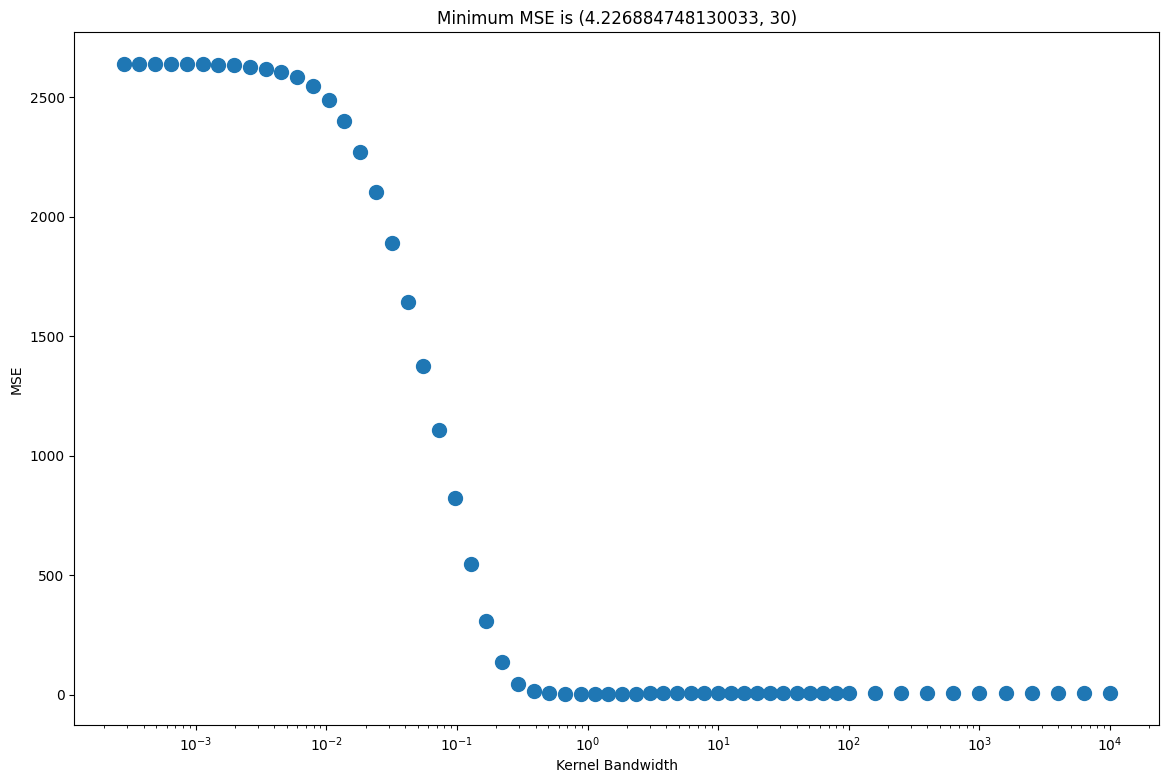

In [4]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files_nonfull(config=config, root_dir=root_dir)
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 1], np.argmin(mses.mse)}")